In [1]:
R.version.string
print("email: 'Maciek Sykulski'<macieksk@gmail.com>")
length(ls())
getwd()

[1] "R version 3.5.1 (2018-07-02)"

[1] "email: 'Maciek Sykulski'<macieksk@gmail.com>"


[1] 0

[1] "/home/hackyeah/hackyeah2018"

In [3]:
projDir<-"/home/hackyeah/hackyeah2018/"
projectPrefix<-"R_hackyeah_R_geo"

#
load.sources<-function(){
    for (f in  c("utils.R" #Contains inpar, save_new_image, etc
                 #...  
                 ) 
        ){
    source(paste(projDir,"/src/",f,sep=""))
   }
}
load.sources()

In [4]:
#system.time(load(paste(projDir,"/r_saved_images/",projectPrefix,".Rdata",sep="")))
lsos()
gc()

   user  system elapsed 
   0.02    0.00    0.02 

,Type,Size,Rows,Columns
eusTOC,data.frame,2442328,9852,8
BDLtree,data.frame,305240,1437,4
getGoogleMapsSignleAddress,function,167976,NA,NA
MPpowiaty,data.frame,55920,380,3
load.sources,function,25744,NA,NA
getGoogleMapsAddress,function,19008,NA,NA
cpar,function,9000,NA,NA
read.table.into.db,function,7328,NA,NA
db.info,function,6280,NA,NA
safe_command_run,function,5600,NA,NA


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,699390,37.4,1168434,62.5,1168434,62.5
Vcells,1491257,11.4,8388608,64.0,2103943,16.1


In [50]:
gc()
#system.time(save_new_image())

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,792926,42.4,1442291,77.1,1442291,77.1
Vcells,1484007,11.4,2379352,18.2,2379352,18.2


[1] "/home/hackyeah/hackyeah2018//r_saved_images/R_hackyeah_R_geo_2018-11-24_23_08_28.Rdata"


   user  system elapsed 
  0.063   0.009   0.072 

In [6]:
library(lattice)
library(latticeExtra)
library(ggplot2)
library(gplots)
#library(png)

#library(Hmisc)
library(cluster)
library(MASS)
library(reshape)

#library(lumi)
#library(lumiHumanIDMapping)
#library(lumiHumanAll.db)
#library(limma)

#library(annotate)
#library(GOstats)

#library(multtest)
library(matrixStats)
#library(extrafont)
#library(enrichvs)
#library(statmod)
#library(flexmix)


library(SmarterPoland)

load.sources()

sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux buster/sid

Matrix products: default
BLAS: /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] SmarterPoland_1.7   htmltools_0.3.6     httr_1.3.1         
 [4] matrixStats_0.54.0  reshape_0.8.8       MASS_7.3-51.1      
 [7] cluster_2.0.7-1     gplots_3.0.1        ggplot2_3.1.0      
[10] latticeExtra_0.6-28 RColorBrewer_1.1-2  lattice_0

In [11]:
system.time( eusTOC<-getEurostatTOC() )

   user  system elapsed 
  0.154   0.096  11.425 

In [13]:
eusTOC

title,code,type,last.update.of.data,last.table.structure.change,data.start,data.end,values
Database by themes,data,folder,,,,,NA
General and regional statistics,general,folder,,,,,NA
European and national indicators for short-term analysis,euroind,folder,,,,,NA
Business and consumer surveys (source: DG ECFIN),ei_bcs,folder,,,,,NA
Consumer surveys (source: DG ECFIN),ei_bcs_cs,folder,,,,,NA
Consumers - monthly data,ei_bsco_m,dataset,30.10.2018,30.10.2018,1980M01,2018M10,NA
Consumers - quarterly data,ei_bsco_q,dataset,30.10.2018,30.10.2018,1990Q1,2018Q4,NA
Business surveys - NACE Rev. 2 activity (source: DG ECFIN),ei_bcs_bs,folder,,,,,NA
Industry - monthly data,ei_bsin_m_r2,dataset,30.10.2018,30.10.2018,1980M01,2018M10,NA
Industry - quarterly data,ei_bsin_q_r2,dataset,30.10.2018,30.10.2018,1980Q1,2018Q4,NA


In [51]:
#MPpowiaty<-getMPpowiaty()
head(MPpowiaty)
dim(MPpowiaty)

id,nazwa,wojewodztwo
24,brzezi<U+0144>ski,<U+0141><U+00F3>dzkie
361,zamojski,Lubelskie
14,Bielsko-Bia<U+0142>a,<U+015A>l<U+0105>skie
168,mielecki,Podkarpackie
89,Jastrz<U+0119>bie-Zdr<U+00F3>j,<U+015A>l<U+0105>skie
1,aleksandrowski,Kujawsko-pomorskie


[1] 380   3

In [27]:
BDLtree<-getBDLtree()
BDLtree

Warning message in (function (..., deparse.level = 1) :
"number of columns of result is not a multiple of vector length (arg 1434)"

id,slug,opis,data_aktualizacji
720,produkcja-energii-elektrycznej-wg-zrodel,Rynek materia<U+0142>owy,2016-01-25
641,produkcja-sprzedana-przemyslu-ogolem-1-mieszkanca-podmioty-liczbie-pracujacych-9,Produkcja sprzedana,2016-01-19
645,udzial-sektora-malych-srednich-przedsiebiorstw-produkcji-sprzedanej-przemyslu,Produkcja sprzedana,2016-01-19
640,produkcja-sprzedana-przemyslu-ogolem-1-mieszkanca,Produkcja sprzedana,2016-01-19
133,siec-rozdzielcza-100-km2,Urz<U+0105>dzenia sieciowe,2015-12-18
137,zuzycie-wody-energii-elektrycznej-gazu-gospodarstwach-domowych,Urz<U+0105>dzenia sieciowe,2015-12-18
128,korzystajacy-instalacji-ogolu-ludnosci,Urz<U+0105>dzenia sieciowe,2015-12-18
41434,wartosc-dodana-brutto-1-pracujacego-wedlug-grup-sekcji-pkd-2007,Warto<U+015B><U+0107> dodana brutto (ceny bie<U+017C><U+0105>ce) - pkd 2007 - esa 2010,2015-12-17
41435,wartosc-dodana-brutto-ogolem,Warto<U+015B><U+0107> dodana brutto (ceny bie<U+017C><U+0105>ce) - pkd 2007 - esa 2010,2015-12-17
41422,produkt-krajowy-brutto-1-mieszkanca,Produkt krajowy brutto (ceny bie<U+017C><U+0105>ce) - pkd 2007 - esa 2010,2015-12-17


In [40]:
#getBDLsearch(query = "Lekarze")
grep("medyc",BDLtree$slug,value=TRUE)
BDLtree[grep("pracownicy-medycz",BDLtree$slug),]

[1] "pracownicy-medyczni-posiadajacy-prawo-wykonywania-zawodu-medycznego"
[2] "jednostki-systemu-ratownictwa-medycznego"                           
[3] "sklad-osobowy-zespolow-ratownictwa-medycznego"                      
[4] "medyczne-dzialania-ratownicze"

,id,slug,opis,data_aktualizacji
128,448,pracownicy-medyczni-posiadajacy-prawo-wykonywania-zawodu-medycznego,Kadra medyczna,2015-11-25


In [41]:
pracMedBDL<-getBDLseries(metric_id = 448)
head(pracMedBDL)

ERROR: Error in open.connection(con, "rb"): HTTP error 418.


In [43]:
#getBDLseries

In [25]:
#system("wget http://www.gauss.pl/analityk/drupal/sites/default/files/POWIATY.shp")
#system("mkdir -p geo_data; mv POWIATY.shp geo_data/")
dir("./geo_data")

[1] "POWIATY.shp" "links.md"

In [13]:
library(rgdal)
ogrListLayers(dsn="geo_data/POWIATY.shp")
#setwd("./geo_data")
#paste0(projDir,"/geo_data/POWIATY.shp")
#ogrListLayers() #cb_2017_us_state_20m.shp")

#path.expand(paste0(projDir,"/geo_data/POWIATY.shp"))
#readOGR(dsn=path.expand(paste0("~/hackyeah2018/geo_data/POWIATY.shp")))

# From https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html
powiatyOGR <- readOGR("geo_data/POWIATY.shp",encoding="UTF-8") 
#,layer = "cb_2013_us_state_20m", GDAL1_integer64_policy = TRUE)


[1] "POWIATY"
attr(,"driver")
[1] "ESRI Shapefile"
attr(,"nlayers")
[1] 1

OGR data source with driver: ESRI Shapefile 
Source: "/home/hackyeah/hackyeah2018/geo_data/POWIATY.shp", layer: "POWIATY"
with 380 features
It has 1 fields


In [21]:
head(powiatyOGR$NAZWA)


[1] m. Biała Podlaska m. Białystok      m. Bielsko-Biała  bydgoski         
[5] bytowski          chełmiński       
370 Levels: aleksandrowski augustowski bartoszycki będziński ... żywiecki

In [12]:
?readOGR

In [27]:
class(powiatyOGR)
#powiatyOGR@data
powiatyOGR@polygons[1]

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

[[1]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] 23.14210 52.03004

Slot "area":
[1] 0.006461473

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
          [,1]     [,2]
 [1,] 23.12235 51.99639
 [2,] 23.09594 52.00624
 [3,] 23.09012 52.00372
 [4,] 23.07396 52.00277
 [5,] 23.07237 52.01344
 [6,] 23.08508 52.01511
 [7,] 23.07511 52.02394
 [8,] 23.09143 52.02401
 [9,] 23.09218 52.02563
[10,] 23.08836 52.02706
[11,] 23.09061 52.03234
[12,] 23.06512 52.03393
[13,] 23.07234 52.03547
[14,] 23.08866 52.04234
[15,] 23.08459 52.04304
[16,] 23.09441 52.05433
[17,] 23.12174 52.05837
[18,] 23.12351 52.06168
[19,] 23.14719 52.05979
[20,] 23.14908 52.05348
[21,] 23.15115 52.05217
[22,] 23.20991 52.05681
[23,] 23.21150 52.03310
[24,] 23.20816 52.02588
[25,] 23.20845 52.01712
[26,] 23.19886 52.01932
[27,] 23.19202 52.01562
[28,] 23.19031 52.01302
[29,] 23.18232 52.00907
[30,] 23.17910 52.00945
[31,] 23.17501 52.00641
[32,] 23.16650 

In [20]:
?"SpatialPolygonsDataFrame-class"

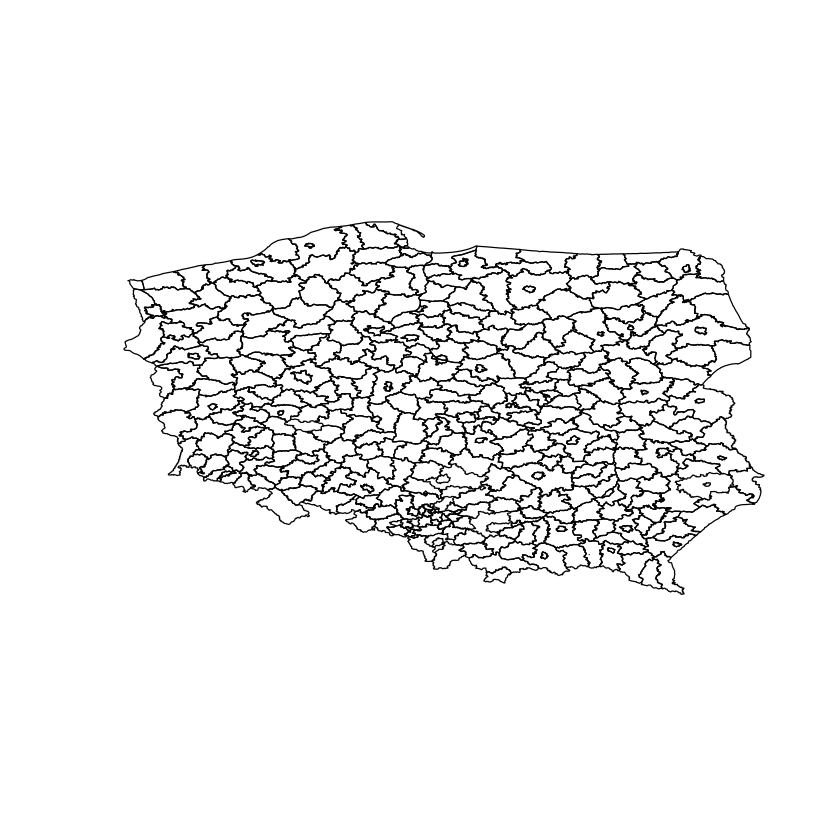

In [15]:
plot(powiatyOGR)

In [39]:
#ogrListLayers

In [19]:
library(maptools)
readShapePoly("geo_data/POWIATY.shp")

Warning message:
"readShapePoly is deprecated; use rgdal::readOGR or sf::st_read"

In [10]:
ogonki<-"żółćęśąźń"
strsplit(ogonki,"")

[[1]]
[1] "ż" "ó" "ł" "ć" "ę" "ś" "ą" "ź" "ń"

In [58]:
?sort

In [67]:
as.integer(36)^12

[1] 4.738381e+18

In [110]:
rep("A",10)

[1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"

In [118]:
str.leneq<-function(s="abcd",k=15,fill=" "){
  n<-nchar(s)
  if (n>=k)
    return(substr(s,1,k))
  do.call(paste0,as.list(c(s,rep(" ",k-n))))
}

str.leneq("abcd",k=5,fill=" ")

[1] "abcd "

In [119]:
str.leneq<-function(s="abcd",k=15,fill=" "){
      n<-nchar(s)
      if (n>=k)
        return(substr(s,1,k))
      do.call(paste0,as.list(c(s,rep(" ",k-n))))
}

str.leneq("abcd",k=10,fill=" ")


sort.str.myOrder<-function(A=c("ade","abc","gih"),myOrderStr="abcdefghijk",retord=FALSE,kstr=50) {
       myOrder<-as.vector(strsplit(myOrderStr,"")[[1]])                                        
       #myOrder
       match("c",myOrder)                    

       Amat<-do.call(rbind,sapply(A,function(v)strsplit(str.leneq(v,k=kstr,fill=" "),"")))
       #Amat
       AmatNum<-as.data.frame(matrix(Vectorize(function(l)match(l,myOrder))(Amat),nrow=dim(Amat)[1],ncol=dim(Amat)[2]))
       #colnames(Amat)                                                

       ord<-do.call(order,lapply(colnames(AmatNum),function(cn)AmatNum[,cn]))
       if(retord) return(ord)
       A[ord]
}                       

sort.str.myOrder(c("adefgg","abc","gihj"))

[1] "abcd      "

[1] "abc"    "adefgg" "gihj"

In [25]:
getGoogleMapsAddress(street = "Banacha 2", city= "Warsaw", country = "Poland")

[1] TRUE
[1] "http://maps.googleapis.com/maps/api/geocode/json?address=Banacha 2,+Warsaw,+Poland&sensor=true"


ERROR: Error: $ operator is invalid for atomic vectors


In [24]:
getGoogleMapsAddress<-function (street = "Banacha 2", city = "Warszawa", country = "Poland", 
    positionOnly = TRUE, delay = 1) 
{
    apiHttps <- paste0("http://maps.googleapis.com/maps/api/geocode/json?address=", 
        street, ",+", city, ",+", country, "&sensor=true")
    res <- sapply(apiHttps, function(apiHttp) {
        Sys.sleep(delay)
        print(positionOnly)
        print(apiHttp)
        getGoogleMapsSignleAddress(apiHttp, positionOnly)
    })
    if (class(res) == "matrix") 
        res <- t(res)
    res
}

In [22]:
#SmarterPoland:::getGoogleMapsSignleAddress
getGoogleMapsSignleAddress<-function (apiHttp, positionOnly = TRUE) 
{
    level <- 0
    apiHttp <- gsub(apiHttp, pattern = " ", replacement = "\\+")
    jsnip <- rjson::fromJSON(file = apiHttp, method = "C")
    if (length(jsnip[[1]]) == 0) {
        apiHttp <- gsub(apiHttp, pattern = "[0-9]", replacement = "")
        jsnip <- rjson::fromJSON(file = apiHttp, method = "C")
        level <- 1
        if (length(jsnip[[1]]) == 0) {
            apiHttp <- gsub(apiHttp, pattern = "address=[^,]*,", 
                replacement = "address=")
            jsnip <- rjson::fromJSON(file = apiHttp, method = "C")
            level <- 2
            if (length(jsnip[[1]]) == 0) {
                apiHttp <- gsub(apiHttp, pattern = "address=[^,]*,", 
                  replacement = "address=")
                jsnip <- rjson::fromJSON(file = apiHttp, method = "C")
                level <- 3
            }
        }
    }
    if (length(jsnip) == 2 & jsnip$status == "OVER_QUERY_LIMIT") 
        return("OVER_QUERY_LIMIT")
    if (positionOnly) 
        return(c(unlist(jsnip[[1]][[1]]$geometry$location), level))
    jsnip$level = level
    jsnip
}